In [1]:
import icechunk as ic
import xarray as xr

storage = ic.s3_storage(
    bucket="nasa-eodc-public",
    prefix="icechunk/MUR-JPL-L4-GLOB-v4.1-native-v0/",
    anonymous=True,
)
repo = ic.Repository.open(storage=storage)
session = repo.readonly_session("main")
ds_native = xr.open_zarr(session.store, consolidated=False, zarr_format=3)

/srv/conda/envs/notebook/lib/python3.12/site-packages/numcodecs/zarr3.py:145: UserWarning: Numcodecs codecs are not in the Zarr version 3 specification and may not be supported by other zarr implementations.
  super().__init__(**codec_config)


In [2]:
storage = ic.s3_storage(
    bucket="nasa-eodc-public",
    prefix="icechunk/MUR-JPL-L4-GLOB-v4.1-virtual-v2-p2",
    anonymous=True,
)
config = ic.Repository.fetch_config(storage=storage)
vchunk_containers = config.virtual_chunk_containers.keys()
container_credentials = ic.containers_credentials(
    {k: ic.s3_credentials(from_env=True) for k in vchunk_containers}
)
repo = ic.Repository.open(
    storage=storage, authorize_virtual_chunk_access=container_credentials
)
session = repo.readonly_session("main")
ds_virtual = xr.open_zarr(session.store, consolidated=False, zarr_format=3)

/srv/conda/envs/notebook/lib/python3.12/site-packages/numcodecs/zarr3.py:145: UserWarning: Numcodecs codecs are not in the Zarr version 3 specification and may not be supported by other zarr implementations.
  super().__init__(**codec_config)


In [3]:
xr.testing.assert_equal(ds_native, ds_virtual.isel(time=[0]))

## They are EXACTLY THE SAME! SO this must be some issue with the time selection?

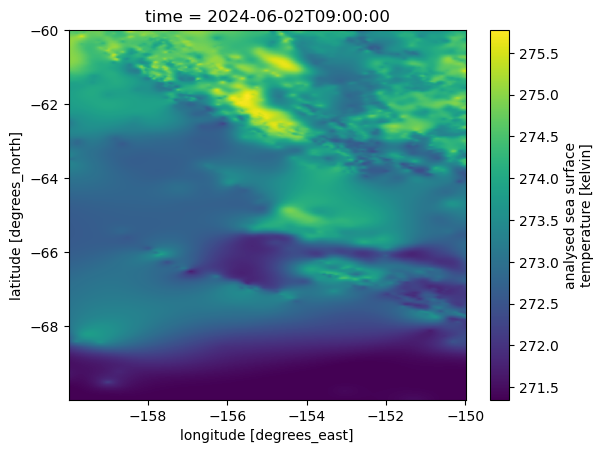

In [5]:
ds_virtual.isel(time=0, lon=slice(2000, 3000), lat=slice(2000, 3000))["analysed_sst"].plot()